In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import graph_tool.all as gt
import networkx as nx
import pickle
import os

In [2]:
# Handle paralelization
gt.openmp_enabled()
gt.openmp_set_num_threads(10)

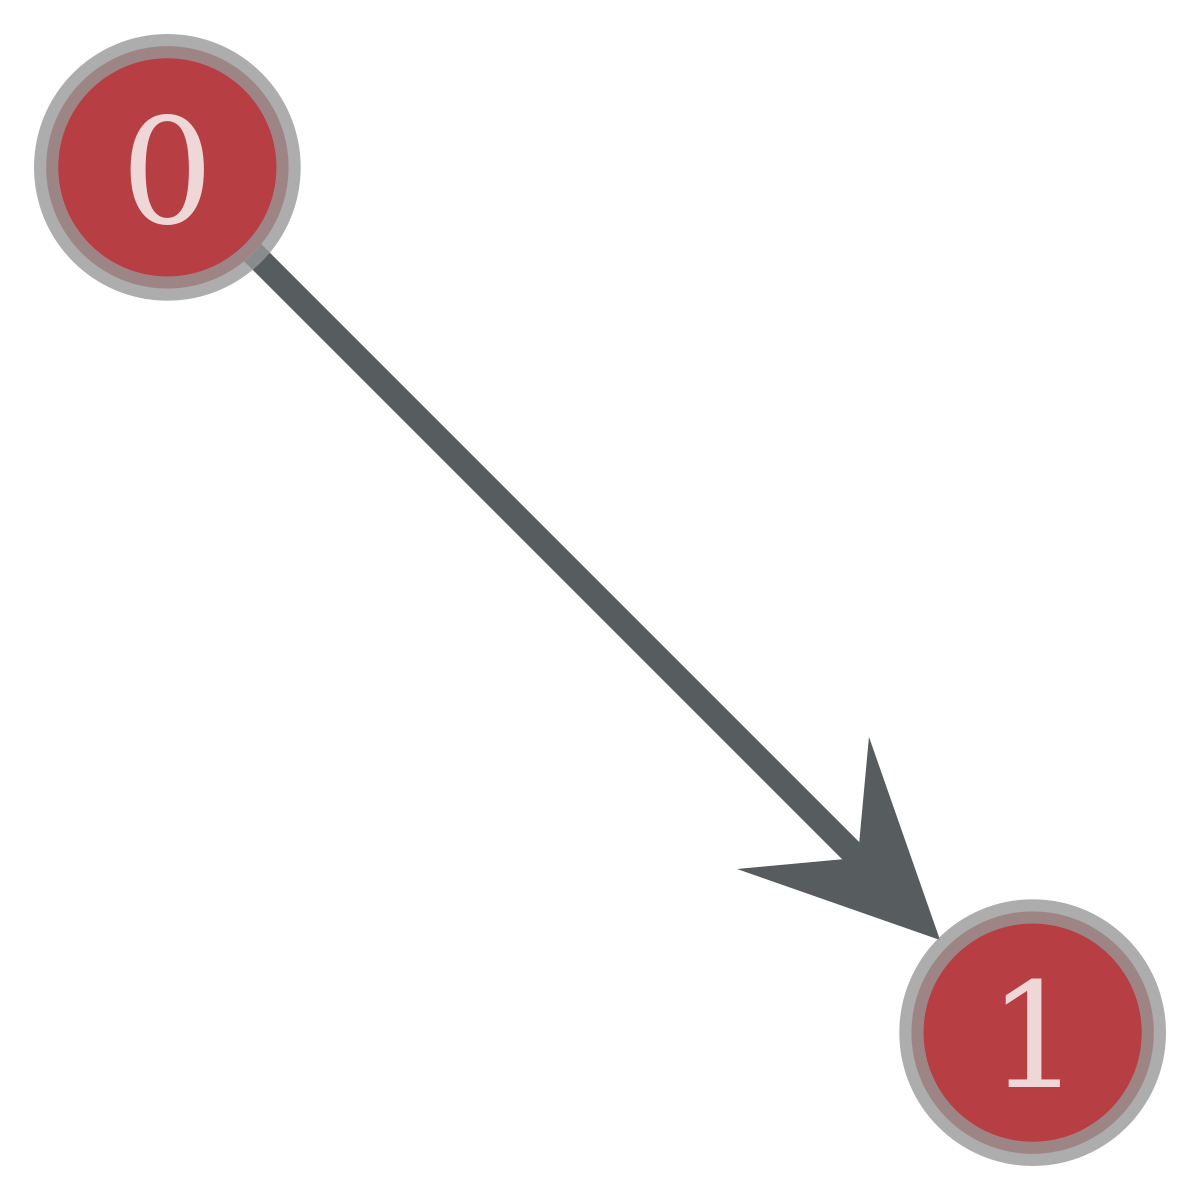

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fef564d2e90, at 0x7fef77753550>

In [4]:
g = gt.Graph()
v1 = g.add_vertex()
v2 = g.add_vertex()
e = g.add_edge(v1, v2)

gt.graph_draw(g, vertex_text=g.vertex_index)

In [27]:
eweight = g.new_ep('double')
vcolor = g.new_vp('string')
eweight[e] = 2.1
vcolor[v1] = '#1c71d8'
vcolor[v2] = '#2ec27e'

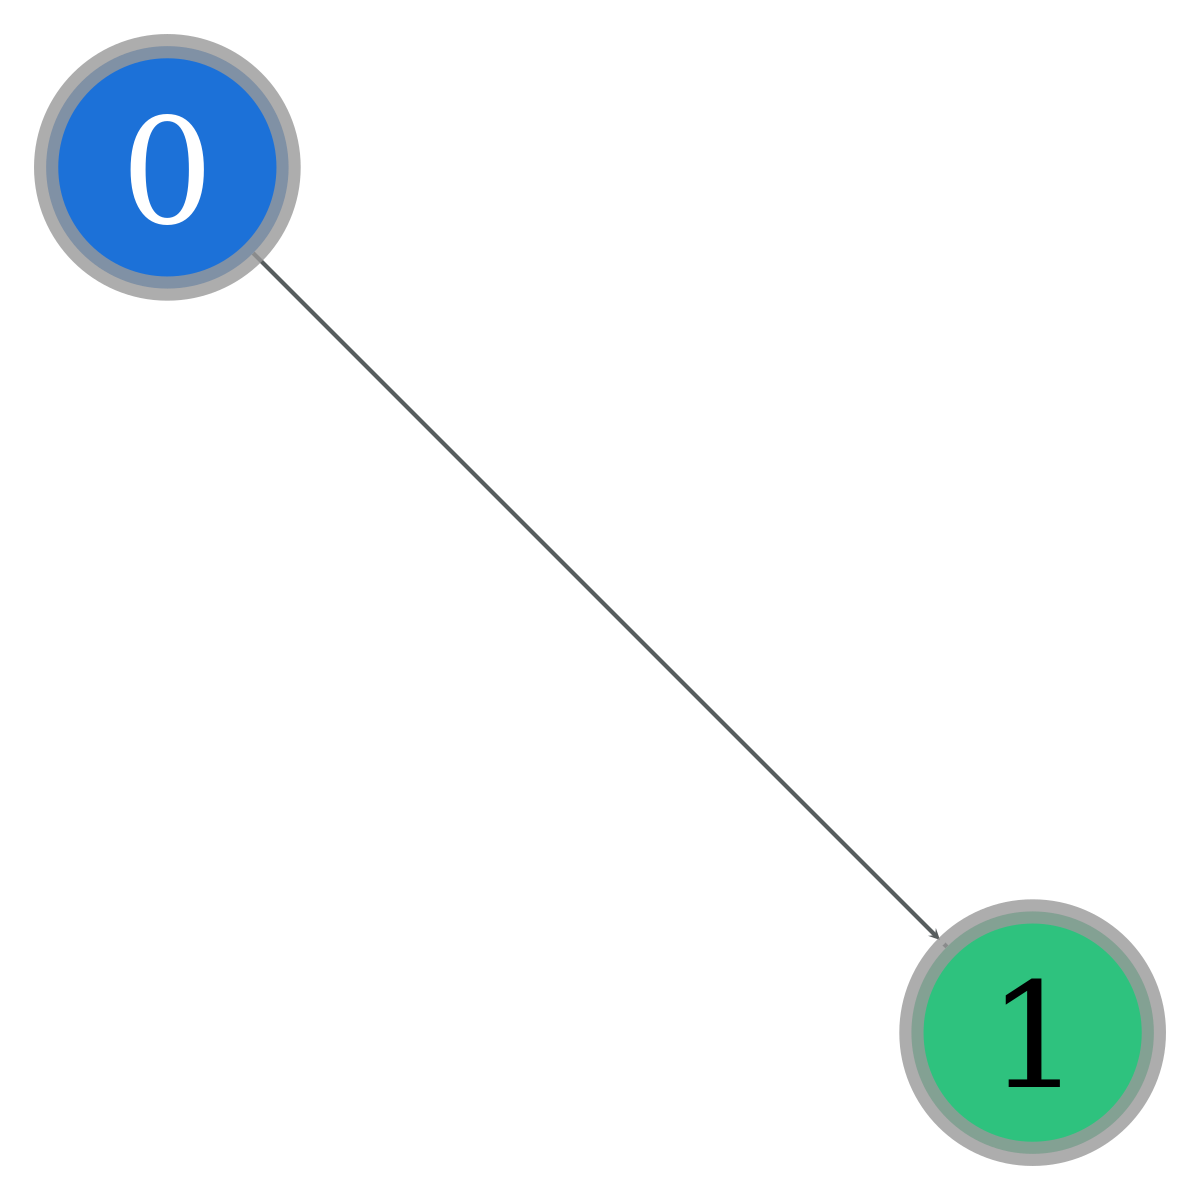

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fef564d2e90, at 0x7fef4a1c35d0>

In [28]:
gt.graph_draw(g, vertex_text=g.vertex_index, vertex_fill_color=vcolor, edge_pen_width=eweight)

In [3]:
# Test how the size of a gt graph compares to a list of tuples/dictionary of lists
# Nodes 1_000_000, edges per node 100, total of 100_000_000 edges

Nodes = np.arange(0, 1_000_000, 1)
edge_dict = {}

for node in Nodes:
    edge_dict[node] = np.random.randint(0, 1000, 100)

In [5]:
G_gt = gt.Graph(edge_dict)

In [31]:
G_nx = nx.Graph(edge_dict)

In [ ]:
G_gt.save('gt_test.gt') # 389MB in .6s

In [6]:
G_gt = gt.load_graph('gt_test.gt') # allocates 1.7% in memory

In [7]:
G_gt.num_edges()

100000000

In [8]:
counts, bins = gt.vertex_hist(G_gt, 'total')

In [9]:
gt.vertex_average(G_gt, 'total')

(200.0, 3.1607123024992325)

In [ ]:
counts, bins = gt.distance_histogram(G_gt, samples=100_000) # utilizing 10 cores, O(samples x V)